In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import sklearn as sk

from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn import linear_model
from sklearn.model_selection import train_test_split

In [3]:
from google.colab import files
uploaded = files.upload()

Saving Heart.csv to Heart.csv


In [4]:
h = pd.read_csv('Heart.csv')
hh = h
hh.head()


,Unnamed: 0,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
0,1,63,1,typical,145,233,1,2,150,0,2.3,3,0.0,fixed,No
1,2,67,1,asymptomatic,160,286,0,2,108,1,1.5,2,3.0,normal,Yes
2,3,67,1,asymptomatic,120,229,0,2,129,1,2.6,2,2.0,reversable,Yes
3,4,37,1,nonanginal,130,250,0,0,187,0,3.5,3,0.0,normal,No
4,5,41,0,nontypical,130,204,0,2,172,0,1.4,1,0.0,normal,No


In [5]:
hh.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 15 columns):
Unnamed: 0    303 non-null int64
Age           303 non-null int64
Sex           303 non-null int64
ChestPain     303 non-null object
RestBP        303 non-null int64
Chol          303 non-null int64
Fbs           303 non-null int64
RestECG       303 non-null int64
MaxHR         303 non-null int64
ExAng         303 non-null int64
Oldpeak       303 non-null float64
Slope         303 non-null int64
Ca            299 non-null float64
Thal          301 non-null object
AHD           303 non-null object
dtypes: float64(2), int64(10), object(3)
memory usage: 35.6+ KB


In [0]:
hh.drop(columns=['ChestPain','Thal'],inplace=True)


In [0]:
hh.head()

,Unnamed: 0,Age,Sex,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,AHD
0,1,63,1,145,233,1,2,150,0,2.3,3,0.0,No
1,2,67,1,160,286,0,2,108,1,1.5,2,3.0,Yes
2,3,67,1,120,229,0,2,129,1,2.6,2,2.0,Yes
3,4,37,1,130,250,0,0,187,0,3.5,3,0.0,No
4,5,41,0,130,204,0,2,172,0,1.4,1,0.0,No


In [0]:
h['Thal'].unique()

In [0]:
h1 = h
h1['ChestPain'] = h1.ChestPain.replace(['typical', 'asymptomatic', 'nonanginal', 'nontypical'],[3,0,1,2])
h1['Thal'] = h1.Thal.replace(['fixed', 'normal', 'reversable'],[0,1,2])
h1['AHD'] = h1.AHD.replace(['Yes','No'],[1,0])
h1['Ca'].fillna(0.0,inplace=True)
h1['Thal'].fillna(1.0,inplace=True)
h1.columns

Index(['Unnamed: 0', 'Age', 'Sex', 'ChestPain', 'RestBP', 'Chol', 'Fbs',
       'RestECG', 'MaxHR', 'ExAng', 'Oldpeak', 'Slope', 'Ca', 'Thal', 'AHD'],
      dtype='object')

In [0]:
X = h1[['Age', 'Sex', 'ChestPain', 'RestBP', 'Chol', 'Fbs',
       'RestECG', 'MaxHR', 'ExAng', 'Oldpeak', 'Slope', 'Ca', 'Thal']]
y = h1.AHD

X = sm.add_constant(X)
model = sm.OLS(y,X).fit()
predictions = model.predict(X)

model.summary()

/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    AHD   R-squared:                       0.523
Model:                            OLS   Adj. R-squared:                  0.501
Method:                 Least Squares   F-statistic:                     24.36
Date:                Sun, 05 May 2019   Prob (F-statistic):           3.21e-39
Time:                        07:37:27   Log-Likelihood:                -106.79
No. Observations:                 303   AIC:                             241.6
Df Residuals:                     289   BIC:                             293.6
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0491      0.300     -0.164      0.870      -0.639       0.541
Age           -0.0014      0.003     -0.504      0.615      -0.007       0.004
Sex            0.1995      0.047      4.267      0.000       0.107       0.292
ChestPain     -0.0948      0.024     -3.932      0.000      -0.142      -0.047
RestBP         0.0026      0.001      2.064      0.040       0.000       0.005
Chol           0.0003      0.000      0.740      0.460      -0.001       0.001
Fbs           -0.0607      0.059     -1.029      0.304      -0.177       0.055
RestECG        0.0293      0.021      1.380      0.169      -0.012       0.071
MaxHR         -0.0028      0.001     -2.503      0.013      -0.005      -0.001
ExAng          0.1567      0.051      3.090      0.002       0.057       0.257
Oldpeak        0.0341      0.023      1.470      0.143      -0.012       0.080
Slope          0.0897      0.042      2.117      0.035       0.006       0.173
Ca             0.1497      0.025      5.955      0.000       0.100       0.199
Thal           0.1380      0.037      3.691      0.000       0.064       0.212
==============================================================================
Omnibus:                        6.297   Durbin-Watson:                   1.976
Prob(Omnibus):                  0.043   Jarque-Bera (JB):                6.419
Skew:                           0.354   Prob(JB):                       0.0404
Kurtosis:                       2.923   Cond. No.                     4.82e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.82e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [0]:
influence = model.get_influence()
resid_student = influence.resid_studentized_external 

In [0]:
resid = pd.concat([X,pd.Series(resid_student,name = 'Studentized Residuals')],axis=1)
resid.head()
# resid.shape

,const,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,Studentized Residuals
0,1.0,63,1,3,145,233,1,2,150,0,2.3,3,0.0,0.0,-0.437913
1,1.0,67,1,0,160,286,0,2,108,1,1.5,2,3.0,1.0,-0.840254
2,1.0,67,1,0,120,229,0,2,129,1,2.6,2,2.0,2.0,-0.384801
3,1.0,37,1,1,130,250,0,0,187,0,3.5,3,0.0,1.0,-1.227935
4,1.0,41,0,2,130,204,0,2,172,0,1.4,1,0.0,1.0,0.138081


In [0]:
ind = resid.loc[np.absolute(resid['Studentized Residuals'])>3,:].index            # cant use iloc ???
ind

Int64Index([], dtype='int64')

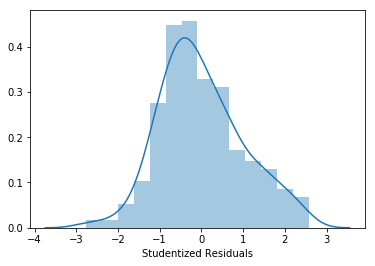

In [0]:
sns.distplot(resid['Studentized Residuals']);

In [0]:
resid['Studentized Residuals'].skew()

0.350993169016449

In [0]:
def calculate_vif(x):
    thresh = 5.0
    output = pd.DataFrame()
    k = x.shape[1]
    vif = [variance_inflation_factor(x.values, j) for j in range(x.shape[1])]
    for i in range(1,k):
        print("Iteration no.")
        print(i)
        print(vif)
        a = np.argmax(vif)
        print("Max VIF is for variable no.:")
        print(a)
        if vif[a] <= thresh :
            break
        if i == 1 :          
            output = x.drop(x.columns[a], axis = 1)
            vif = [variance_inflation_factor(output.values, j) for j in range(output.shape[1])]
        elif i > 1 :
            output = output.drop(output.columns[a],axis = 1)
            vif = [variance_inflation_factor(output.values, j) for j in range(output.shape[1])]
    return(output)

In [0]:
calculate_vif(X)

Iteration no.
1
[218.93502214406257, 1.4927237123735457, 1.1607106158462992, 1.3033889697066676, 1.1841396996579805, 1.1518173005102785, 1.0743514831567131, 1.0859616374156749, 1.6235818232653108, 1.380097501121203, 1.761177338077678, 1.657763092541087, 1.340710632130275, 1.1554787950397778]
Max VIF is for variable no.:
0
Iteration no.
2
[41.53123240680641, 3.4470078546140677, 2.29837750930513, 59.981769665270335, 26.382234222840196, 1.242102655713752, 2.149937112284672, 35.56685342737092, 2.0073535259189845, 3.130784852484043, 11.461156277834263, 2.016160281718274, 7.129428477035073]
Max VIF is for variable no.:
3
Iteration no.
3
[31.01771085008107, 3.446476324959936, 2.2899301077920446, 26.02166537021645, 1.2255336872500626, 2.1398803576053336, 26.671193699258378, 1.9832796045472387, 3.0935490976941717, 11.287204450662353, 2.0083057679389573, 7.098108712635412]
Max VIF is for variable no.:
0
Iteration no.
4
[3.4447686429494095, 2.2812274800743, 21.698558598064515, 1.2221941607570432,

,Sex,ChestPain,Fbs,RestECG,ExAng,Oldpeak,Ca,Thal
0,1,3,1,2,0,2.3,0.0,0.0
1,1,0,0,2,1,1.5,3.0,1.0
2,1,0,0,2,1,2.6,2.0,2.0
3,1,1,0,0,0,3.5,0.0,1.0
4,0,2,0,2,0,1.4,0.0,1.0
5,1,2,0,0,0,0.8,0.0,1.0
6,0,0,0,2,0,3.6,2.0,1.0
7,0,0,0,0,1,0.6,0.0,1.0
8,1,0,0,2,0,1.4,1.0,2.0
9,1,0,1,2,1,3.1,0.0,2.0


In [0]:
from sklearn.linear_model import LogisticRegression
log = LogisticRegression()
skm = log.fit(X,y)
# log.summary()

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [0]:
from sklearn.metrics import accuracy_score
a = log.predict(X)
accuracy_score(a,y)
# log.score(X,y)                                  # both are actually same model.score actually calls the accuracy_score func 


0.8613861386138614

In [0]:
ya = np.asarray(y)
ya.shape
xl


NameError: ignored

In [0]:
from statsmodels.api import Logit
xl = X[['Sex','ChestPain','Fbs','RestECG','ExAng','Oldpeak','Ca','Thal']]
# xa = np.asarray(xl)
lg = sm.Logit(xl,y).fit()
# lg.summary()

ValueError: ignored

In [0]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(X,y,test_size = 0.2 , random_state = 100)

In [0]:
print(x_train.shape)

print(x_test.shape)

print(y_train.shape)

print(y_test.shape)



(242, 14)
(61, 14)
(242,)
(61,)


In [0]:
from sklearn import metrics
from sklearn.metrics import classification_report

ypred = log.predict(x_test)
print(ypred.shape)

cm = metrics.confusion_matrix(y_test,ypred)
print(cm)


(61,)
[[32  2]
 [ 3 24]]


In [0]:
print(classification_report(y_test,ypred))

              precision    recall  f1-score   support

           0       0.91      0.94      0.93        34
           1       0.92      0.89      0.91        27

   micro avg       0.92      0.92      0.92        61
   macro avg       0.92      0.92      0.92        61
weighted avg       0.92      0.92      0.92        61



In [0]:
log.score(x_train,y_train)

0.8471074380165289

In [0]:
log.score(x_test,y_test)

0.9180327868852459

In [0]:
metrics.accuracy_score(y_test,ypred)

0.9180327868852459

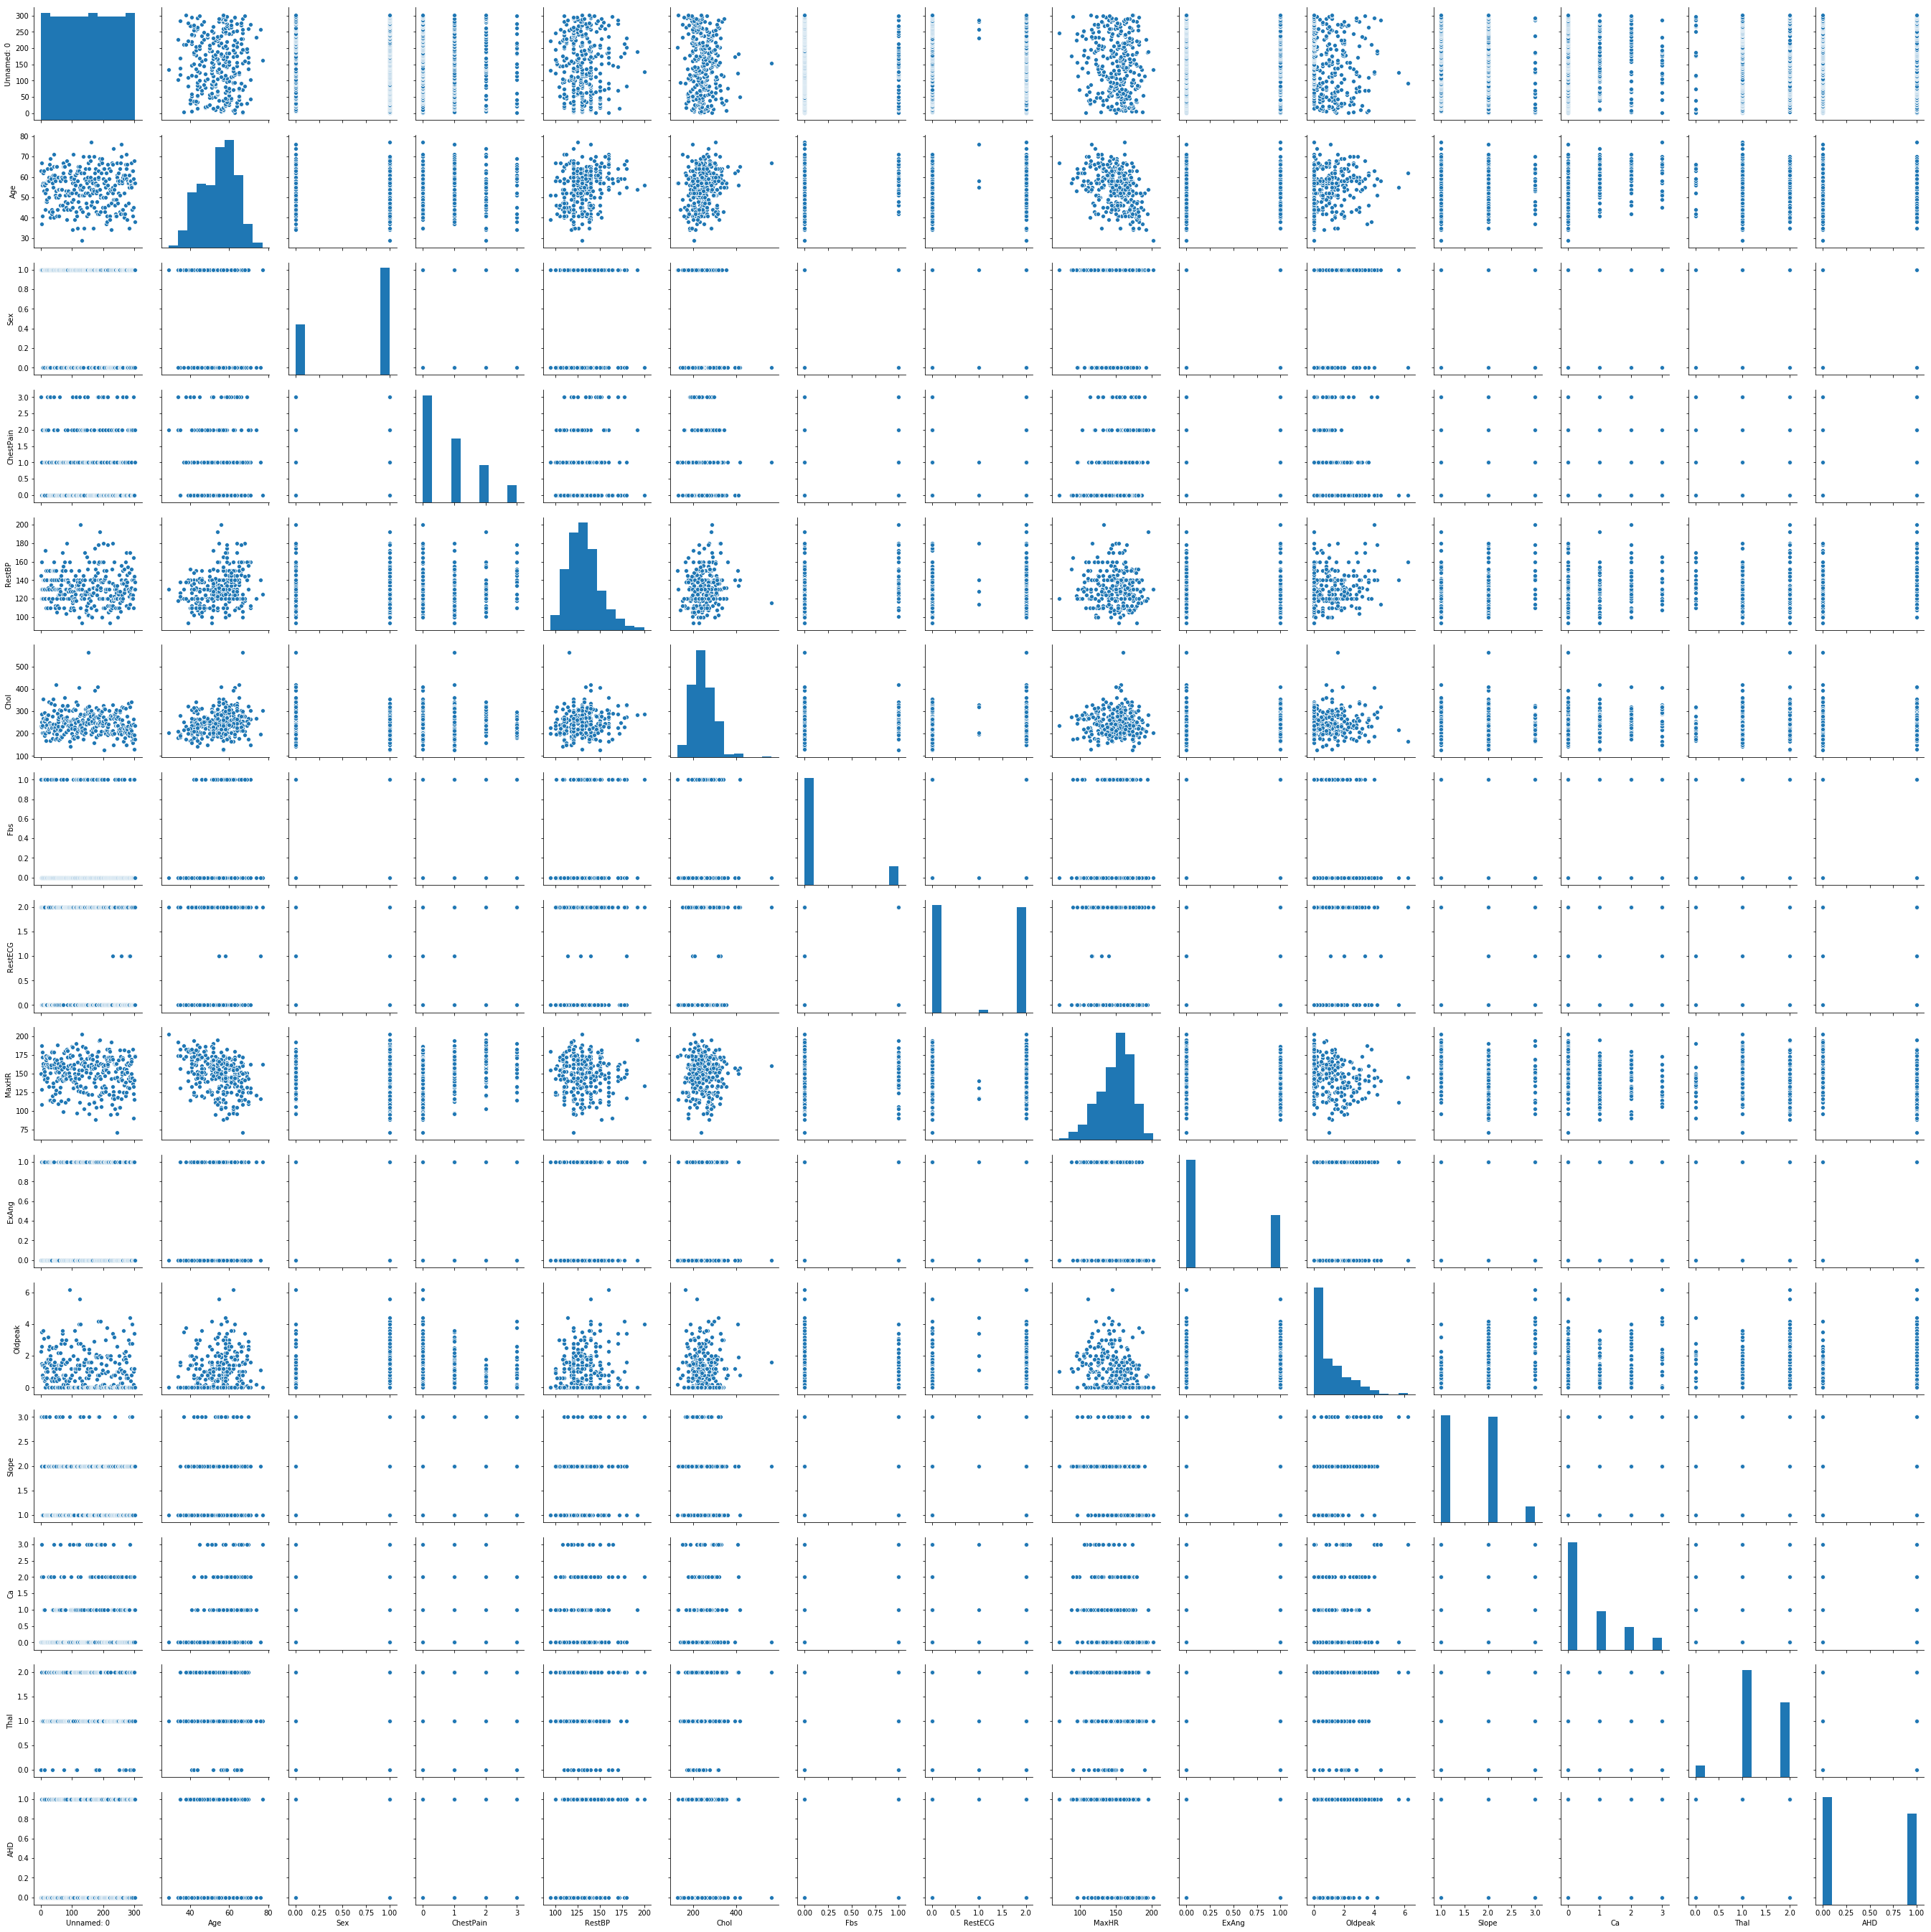

In [0]:
sns.pairplot(h1)